<a href="https://colab.research.google.com/github/jsAiyaya/JSC270_Data_Science_1/blob/main/Lab5_Simulation_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 5: Simulation

##Simulating Coin Tosses

##### Let's start by building a coin flip simulator! 

##### We'll define a function that is a "coin flipper", taking the argument:
>##### heads_prob: the probability of heads
##### and returns:
>##### 1 if heads, 0 if tails

In [ ]:
## import bernoulli class from scipy.stats library
from scipy.stats import bernoulli

## define function
def coin_flipper(heads_prob):

  heads = bernoulli.rvs(p=heads_prob, size=1)

  return heads[0] ## adding the [0] pulls the value out of the array

### Discussion Question 1
####Run a few trials of *coin_flipper*.  Are you seeing what you expect? 

In [ ]:
# One way to check is to run the simulator many times and see if the percentage 
# of heads is close to the specified heads_prob

# When running simulations it is important to set the seed of the random number
# generator so your results can be replicated
# Make sure to do this in Assignment 3!!
import numpy as np
np.random.seed(2022)

my_heads_prob = 0.9
my_result = [coin_flipper(my_heads_prob) for n in range(1,100)]

In [ ]:
sum(my_result)/len(my_result)

0.898989898989899

### Discussion Question 2

#### Before moving on to the next exercise, can anyone remember the difference between a binomial and a bernoulli distribution?

In [ ]:
# A bernoulli distribution describes the behavior a random variable with two possible 
# outcomes, one occuring with probability p and the other occuring 
# with probability (1-p).
# For instance, we can describe the behavior of a coin toss with a bernoulli distribution. 

# A binomial distribution describes the behavior of a sequence of random variables
# where each element of the sequence has with two possible outcomes, 
# one occuring with probability p and the other occuring with probability (1-p).
# For instance, we can discribe the behavior of n coin tosses with a binomial(n, p) distribution.


# You can read more above the distributions on wikipedia:
# https://en.wikipedia.org/wiki/Bernoulli_distribution
#https://en.wikipedia.org/wiki/Binomial_distribution

### Exercise 1

##### Now define two "heads_counter" functions that take arguments:
>##### heads_prob, the probability of heads
>##### n_flips, the number of flips
##### and each return:
>##### k, the number of heads

##### Make one function using your *coin_flipper* function from above and the other function using a *binomial random value generator*. 

##### Check out the [scipy documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to see how you can generate realizations from a binomial distribution.  This site also gives a complete list of available distributions in the stats module.

##### Compare the outputs of your two functions for a 50 flips with a probability of heads equal to 0.5.

In [ ]:
### Define heads_counter1 using coin_flipper which relies on 
### on the bernoulli random variable generator.

def heads_counter1(heads_prob, n_flips):

  heads_count = 0

  for draw in range(n_flips):
    heads_count += coin_flipper(heads_prob=heads_prob)

  return heads_count

In [ ]:
### Define heads_counter2 using binomial random variable generator.

from scipy.stats import binom
# import numpy as np - note you could've also used numpy!

def heads_counter2(heads_prob, n_flips):

  heads_count = binom.rvs(n=n_flips, p=heads_prob, size=1)
  # heads_count = np.random.binomial(n=n_flips,p=heads_prob)

  return heads_count[0]

In [ ]:
### Compare output from each function

print(heads_counter1(0.5,50))
print(heads_counter2(0.5,50))


21
27


#### Suppose we want to test if the two *heads_counter* functions output systematically different counts.

### Discussion Question 3: How should we go about doing this? 

#### Let's go through it together. First, define a function *heads_diff* which draw samples from each of these heads_counter functions and compares them, taking as arguments: 
>##### rs, the number of times to sample from each function
>##### n, the number of flips 
>##### p, the probability of heads

##### and returns: 
>##### a list output from *heads_counter1* 
>##### a list output from *heads_counter2*

In [ ]:
resample_size = 1000
n_flips = 50
heads_p = 0.5

def heads_diff(rs, n, p):

  hc1 = [heads_counter1(p, n) for i in range(rs)]
  hc2 = [heads_counter2(p, n) for i in range(rs)]

  return hc1, hc2

h1,h2 = heads_diff(rs=resample_size,n=n_flips,p=heads_p)

####Next, plot your data and test your hypothesis

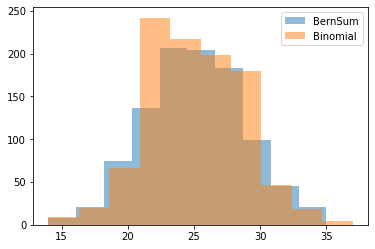

In [ ]:
### plot
import matplotlib.pyplot as plt

plt.hist(h1, alpha=0.5, label="BernSum")
plt.hist(h2, alpha=0.5, label="Binomial")
plt.legend(loc='upper right')
plt.show()

In [ ]:
## Non-parametric, Wilcoxon test

from scipy.stats import wilcoxon

wilcoxon(h1,h2)


WilcoxonResult(statistic=216840.5, pvalue=0.9919634236160005)

In [ ]:
## parametric independent samples t-test

from scipy.stats import ttest_ind

ttest_ind(h1,h2)

Ttest_indResult(statistic=-0.04964329785914643, pvalue=0.9604116043898603)

##Law of large numbers

#### The (Strong) Law of Large Numbers (LLN) states that the empirical average gets closer and closer to the population average as the sample size increases.


#### Let's keep using our functions from above, but consider the case in which we are taking more and more samples. 

## Discussion Question 4: What do we expect to happen to the mean and variance of our data as we collect more samples? 

In [ ]:
# Intuitively, we can imagine that as our sample becomes larger and larger, it becomes a more accurate
# representation of the population. So, we would expect the empirical mean and variance to both 
# get closer to the population values. 

# Another possible explanation applying similar thinking to the LLN.
# The empirical mean and variance are both averages so would expect 
# them to converge to their population value as the sample size increases.

####Choose one of the *head_counter* functions and simulate 10, 100, 1000, and 10000 samples when we make 100 coin flips with probability of flipping heads=0.5

In [ ]:
## sample data 
s10 = [heads_counter2(0.5, 100) for i in range(10)]
s50 = [heads_counter2(0.5, 100) for i in range(100)]
s100 = [heads_counter2(0.5, 100) for i in range(1000)]
s1000 = [heads_counter2(0.5, 100) for i in range(10000)]

#### Let's compute the population mean and variance as well as the empirical/sample mean and variance for each sample and plot the distribution. 

In [ ]:
## population mean = n*p ; population var = np(1-p)

print("Population mean: " + str(.5*100))

print("Population var: "  + str(0.5*0.5*100))


Population mean: 50.0
Population var: 25.0


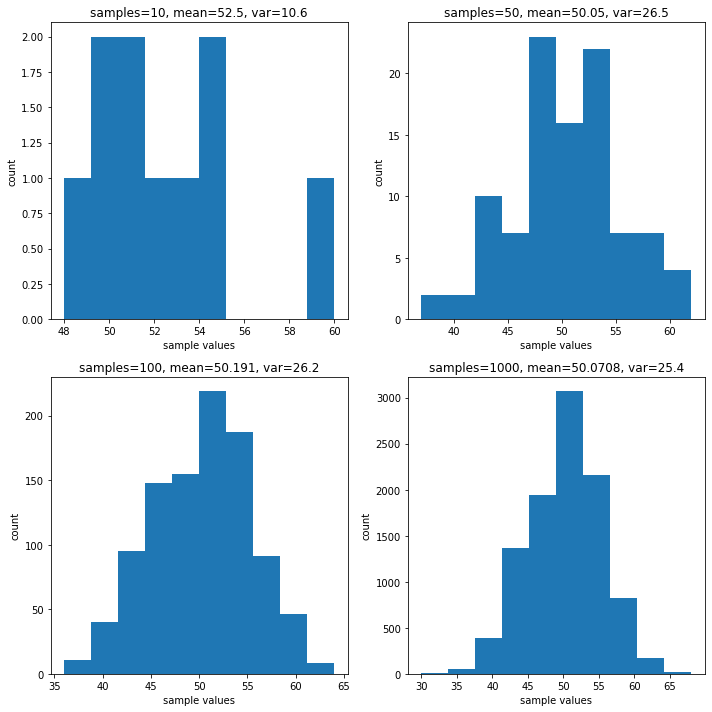

In [ ]:
## plot distributions
import numpy as np
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].hist(s10)
axs[0, 0].set_title('samples=10, mean='+str(np.mean(s10))+', var='+str(np.round(np.var(s10),decimals=1)))
axs[0, 1].hist(s50)
axs[0, 1].set_title('samples=50, mean='+str(np.mean(s50))+', var='+str(np.round(np.var(s50),decimals=1)))
axs[1, 0].hist(s100)
axs[1, 0].set_title('samples=100, mean='+str(np.mean(s100))+', var='+str(np.round(np.var(s100),decimals=1)))
axs[1, 1].hist(s1000)
axs[1, 1].set_title('samples=1000, mean='+str(np.mean(s1000))+', var='+str(np.round(np.var(s1000),decimals=1)))

for ax in axs.flat:
    ax.set(xlabel='sample values', ylabel='count')

fig.tight_layout()

### Discussion Question 5: Are we seeing what we expect here? Is the behavior consistent with the LLN?

In [ ]:
# Yes, the as the sample size increases the empirical mean and variance are getting closer to their true (population) values.

## Investigating the behavior of the empirical/sample mean

#### Next, let's consider simulating from the distribution this *estimator*.

#### Specifically, we'll consider estimating the population mean $\mu$ with $\bar{X}$ based on a random sample from a binomial distribution.  

#### It can be shown that for random sample of size $n$ from a distribution with standard deviation $\sigma$, the standard error (SE) of $\bar{X}$ is

>#### $SE[\bar{X}] = \frac{SD[X_1]}{\sqrt{n}} $

#### This formula is true not only for binomial random variables, but for any random variables from a distribution with finite variance.

#### Let's use simulation to confirm this formula in the binomial case. 

### Exercise 2

####First, define a function called *sample_estimate* which takes the arguments

>##### n_draws, sample size
>##### n_flips, n parameter for the binomial distribution (the number of flips)
>##### p_heads, the probability of the coin landing on heads

#### and returns
>##### the mean from the n_draws

Run your function for 1000 datasets containing a sequence of 10 flips with an underlying probability of heads of 1/2.

In [ ]:
### sample_estimate function: 
def sample_estimate(n_draws, n_flips, p_heads):
  return np.mean([heads_counter2(p_heads, n_flips=n_flips) for i in range(n_draws)])

sample_estimate(n_draws=1000,n_flips=10,p_heads=0.5)

5.03

### Exercise 3

####Next define a function *estimator_sampler* that samples over these sample estimates, taking the same arguments plus n_samples, the number of sample estimates to compute and returns: 
>##### a tuple: mean, standard error

#### Use your function to obtain mean and standard error estimates from 1000 simulated datasets containing 10 sequences of 10 flips with an underlying probability of heads of 1/2. 

####Compare the output containing your estimates to the population mean and the standard error formula stated above.

In [ ]:
### estimator_sampler function:
def estimator_sampler(n_d,n_f,p_h,n_s):
  estimates = [sample_estimate(n_d,n_f,p_h) for i in range(n_s)]
  return estimates, np.mean(estimates), np.sqrt(np.var(estimates))

In [ ]:
heads_p = 0.5
n_flips = 10 
n_draws_in_sample = 10 ### make this reflect your *actual* data
n_samples = 10000 ### run as many of these as possible to make your estimate accurate

all_est_mean, est_mean, est_se = estimator_sampler(n_draws_in_sample, n_flips, heads_p, n_samples)

a_mean = np.round(n_flips*heads_p,decimals=3)
a_se = np.sqrt(np.round((n_flips*heads_p*(1-heads_p))/n_draws_in_sample,decimals=3))

In [ ]:
print("Validating the SE formula using simulation for the binomial.")
print("Estimated mean: " + str(np.round(est_mean,decimals=3)) + ", Estimated SE: " + str(np.round(est_se,decimals=3)))
print("True (Population) mean: " + str(a_mean) + ", True SE: " + str(a_se))

Validating the SE formula using simulation for the binomial.
Estimated mean: 5.007, Estimated SE: 0.503
True (Population) mean: 5.0, True SE: 0.5


## Investigating the behavior of the sample median

### Exercise 4

#### Now let's consider the sample median.

#### Create a *median_estimate* function and a sampler function like you did in the previous exercise for the mean.

#### Use your function to obtain median estimates from 1000 simulated datasets containing 10 sequences of 10 flips with an underlying probability of heads of 1/2. 

#### Plot the distribution of your estimates.


In [ ]:
### defining median_estimate function
def median_estimate(n_draws, n_flips, p_heads):
  return np.median([heads_counter2(p_heads, n_flips=n_flips) for i in range(n_draws)])

### defining median sampler
def median_sampler(n_d,n_f,p_h,n_s):
  estimates = [median_estimate(n_d,n_f,p_h) for i in range(n_s)]
  return estimates

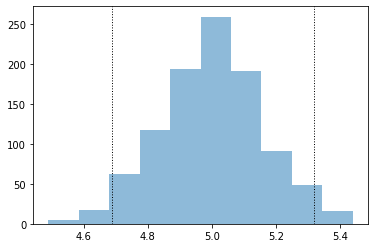

In [ ]:
### try different estimates
heads_p = 0.5
n_flips = 10 
n_draws_in_sample = 100 ### make this reflect your *actual* data
n_samples = 1000 ### run as many of these as possible to make your estimate accurate

est = median_sampler(n_draws_in_sample, n_flips, heads_p, n_samples)

## Plot the 0.025 and -.975 quntiles
num_ucl = np.quantile(est,0.975)
num_lcl = np.quantile(est,0.025)

plt.hist(est, alpha=0.5, label="BernSum")
plt.axvline(num_ucl, color='k', linestyle='dotted', linewidth=1)
plt.axvline(num_lcl, color='k', linestyle='dotted', linewidth=1)

plt.show()

## The Central Limit Theorem (CLT)

###Take 1: Resampling from an arbitrary population

#####The first take on the CLT we will take is sampling from a population. 

##### Consider an iid sample of size $n$ from a distribution with mean $\mu$ and variance $\sigma^2$. The CLT states that the distribution of $\bar{X}$ is approximately (ie. when $n$ is large) as the sample  normal with mean $\mu$ and variance $\sigma/n$.

## Discussion Question 6: Have we already seen the CLT in this lab?

In [ ]:
# Yes, we saw the CLT when investigating the distribution of heads earlier in lab.

# We also investigated the behavuor of the empirical mean when studying the standard error formula
# Note though that the sample size was only 10.

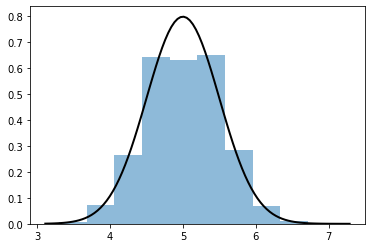

In [ ]:
from scipy.stats import norm
plt.hist(all_est_mean, alpha=0.5, density = True,
         label="Distribution of the Empirical Mean")

# Plot an overlaying histogram 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, a_mean, a_se)
  
plt.plot(x, p, 'k', linewidth=2)

plt.show()

####Let's create an arbitrary distribution sampler by mixing different distributions

In [ ]:
#### definining my_dist_sampler:
def my_dist():
  x = np.random.beta(3,10) + np.random.poisson(2) + np.random.binomial(10,0.2)
  return x

def my_dist_sampler(n):
  my_sample = [my_dist() for i in range(n)]
  return my_sample

#### Plot the distribution of a sample from your arbitrary distribution

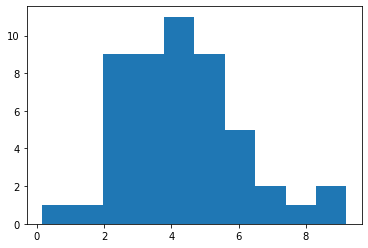

In [ ]:
plt.hist(my_dist_sampler(50))
plt.show()


#### Now create a means sampler for this distribution and plot the distribution of means over 1000 samples of size 50

#### Plot the distribution of the means and compare the theoretical and numerical confidence intervals.

In [ ]:
def mean_dist(n,n_rs):
  means = [np.mean(my_dist_sampler(n=n)) for i in range(n_rs)]
  return means, np.mean(means), np.std(means)


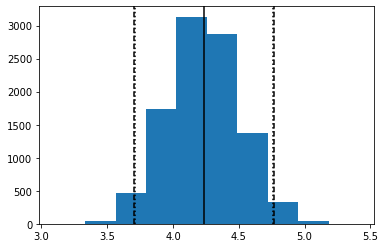

In [ ]:
my_means, rs_mean, rs_sd = mean_dist(n=50, n_rs=10000)

num_lcl = np.quantile(my_means, 0.025)
num_ucl = np.quantile(my_means, 0.975)

plt.hist(my_means)
plt.axvline(rs_mean, color = 'k')
plt.axvline(rs_mean - 1.96*rs_sd, color = 'k', linestyle="dashed")
plt.axvline(rs_mean + 1.96*rs_sd, color = 'k', linestyle="dashed")
plt.axvline(num_lcl, color = 'k', linestyle="dotted")
plt.axvline(num_ucl, color = 'k', linestyle="dotted")

### Discussion Question 7: Does the CLT appear to be holding up in this example?

In [ ]:
# Yes, it does.  The distribution appears to be normal and centered at the population mean.

### Another application of the CLT: The normal approximation of the binomial 

#### Now lets consider another application of the central limit theorem: the normal approximation for the binomial distribution. 


#### A general rule of thumb for the normal approximation of the binomial to hold is   $n*p > 5$ where $n$ is the number of trials and $p$ is the probability of success. 

## ## Discussion Question 8 : Why does the Binomial grow more "normal" as n gets larger (assume p is fixed)?



In [ ]:
# Recall that a binomial can be viewed as a sum of bernoullis 
#  we'd therefore expect its behavior (scaled by 1/n) to be approximately normal


# More explicitly, (\sum_{i =1}^n X_i - np) /\sqrt(n p(1-p)) = \sqrt{n}(\Xbar - p)/\sqrt( p(1-p)) ~ N(0,1) by the CLT
# So as n gets larger, the normality assumption is more likely to hold

#### So, for our fair coin scenario, let's keep the number of samples at 1000 but make our parameters for the binomial p=0.5 and vary n. 

In [ ]:
## sample data 
d1 = [heads_counter2(0.5, 1) for i in range(1000)]
d3 = [heads_counter2(0.5, 3) for i in range(1000)]
d5 = [heads_counter2(0.5, 5) for i in range(1000)]
d10 = [heads_counter2(0.5, 10) for i in range(1000)]
d50 = [heads_counter2(0.5, 50) for i in range(1000)]
d100 = [heads_counter2(0.5, 100) for i in range(1000)]
d500 = [heads_counter2(0.5, 500) for i in range(1000)]
d1000 = [heads_counter2(0.5, 1000) for i in range(1000)]

####Next, plot the distribution of your sample values. Do they appear to grow more Gaussian?



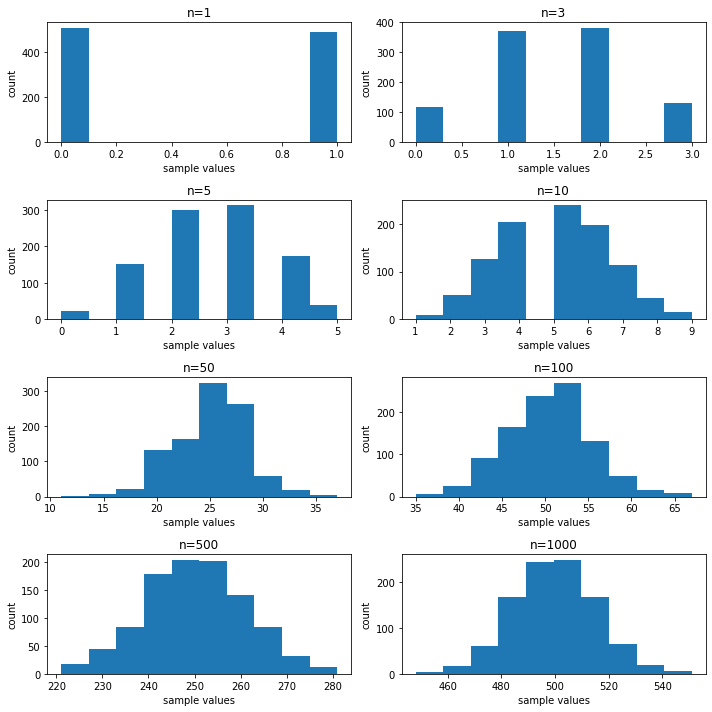

In [ ]:
## plot distributions

fig, axs = plt.subplots(4, 2, figsize=(10,10))
axs[0, 0].hist(d1)
axs[0, 0].set_title('n=1')
axs[0, 1].hist(d3)
axs[0, 1].set_title('n=3')
axs[1, 0].hist(d5)
axs[1, 0].set_title('n=5')
axs[1, 1].hist(d10)
axs[1, 1].set_title('n=10')
axs[2, 0].hist(d50)
axs[2, 0].set_title('n=50')
axs[2, 1].hist(d100)
axs[2, 1].set_title('n=100')
axs[3, 0].hist(d500)
axs[3, 0].set_title('n=500')
axs[3, 1].hist(d1000)
axs[3, 1].set_title('n=1000')

for ax in axs.flat:
    ax.set(xlabel='sample values', ylabel='count')

fig.tight_layout()

plt.show()